In [591]:
import numpy as np
import os
current_directory = os.getcwd()
print(current_directory)

os.chdir('/home/jovyan/home/wakefinder/src/scripts')
import load as ld
import phys_quant as pq
import plots as pl
import rotations as rot
import regioncut as rc
from importlib import reload
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

/home/jovyan/home/wakefinder/src/scripts


## Chequeo de rotacion y carga datos

In [ ]:
# run if checking data files is needed
# import os
# data_script_dir = './'
# data_script_name = 'data_prep.py'
# path = os.path.join(data_script_dir, data_script_name)
# %run $path

In [592]:

#lee los dataset ya verificada la rotacion
mw = ld.txt("mw_rot")
mw_lmc = ld.txt("mw_lmc_rot")
lmc = ld.txt("lmc_rot")


In [593]:
# #Revisar que la operacion sea correcta
rel_lmc = pq.get_rot_orbit(lmc)

lmc shape: (151, 3)
lmc max: 52.08886337735412
shape orb: (151, 6)


In [595]:
reload(pl)
pl.surface_plot(rel_lmc, n_vector)

NameError: name 'n_vector' is not defined

In [ ]:
# #Pruebas
# test_mw = np.random.rand(10,8)
# test_mw_lmc = np.random.rand(10,8)

In [ ]:
# test = pq.add_more_quant(test_mw, test_mw_lmc)

In [ ]:
#Agrega las cantidades fisicas al array de datos
# mw_halo, mw_lmc_halo = pq.add_more_quant(mw, mw_lmc)
# print("the shape of mw_halo is:", mw_halo.shape)
# print("the shape of mw_lmc_halo is:", mw_lmc_halo.shape)

In [597]:
# #graficas orbitas LMC
pl.LMC_plot(rel_lmc, "xy")
pl.LMC_plot(rel_lmc, "xz")
pl.LMC_plot(rel_lmc, "yz")


/srv/conda/envs/notebook/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [598]:
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xy')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xz')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'yz')

(1000000,)
(1000000,)


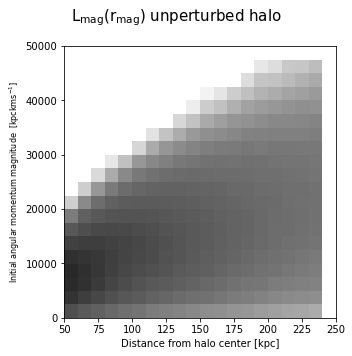

In [458]:
#Grafica de la magnitud del momento angular vs radio
reload(pl)
pl.hist_r_l(mw)
# pl.hist_r_l(mw_lmc_halo)

In [ ]:
# pl.hist_proj_r_l(mw,'yz')

# Primera seleccion

the shape of pos below threshold (307754,)
the shape of ids below threshold (307754,)
first 10 ids [1.04398658e+08 8.77219950e+07 8.50995300e+07 6.28193870e+07
 2.05286200e+07 6.26671980e+07 6.39184520e+07 4.88569010e+07
 9.32216300e+06 1.04990588e+08]
the shape of mw_sel1 (307754, 16)


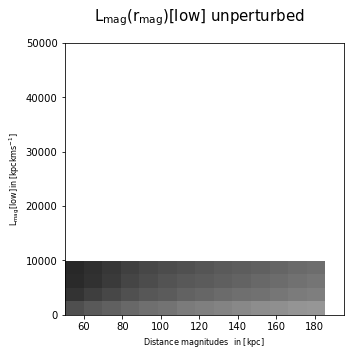

the shape of mw_sel1 (307754, 16)
the shape of common_ids (307754,)
first 10 common ids [1.04398658e+08 8.77219950e+07 8.50995300e+07 6.28193870e+07
 2.05286200e+07 6.26671980e+07 6.39184520e+07 4.88569010e+07
 9.32216300e+06 1.04990588e+08]
all ids are in the perturbed halo
(307754,)
(307754,)


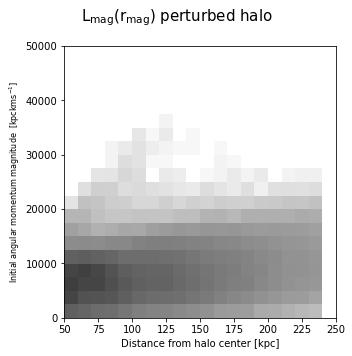

In [637]:
#selecciona las particulas que estan en el rango de radio y momento angular
# low_L, ids_nopert = rc.threshold_L(mw_lmc_halo,5000,10000)
low_L, ids_nopert = rc.threshold_L(mw,0000,10000)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])

print("the shape of mw_sel1", mw_sel1.shape)
reload(pl)
pl.hist_L_r_low(mw_sel1[:,8], mw_sel1[:,10],'mw_sel1')
print("the shape of mw_sel1", mw_sel1.shape)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])
ids_perthalo, common_ids = rc.get_ids(mw, mw_lmc, ids_nopert)
# ids_perthalo, common_ids = rc.get_ids(mw_lmc_halo, mw_halo, ids_nopert)
# check if all selected particles are in the perturbed halo
# rc.test_ids(common_ids, mw_halo)

rc.test_ids(common_ids, mw_lmc)
#select particles in the perturbed halo
mw_lmc_sel1 = np.copy(mw_lmc[ids_perthalo])
# mw_lmc_sel1 = np.copy(mw_halo[ids_perthalo])

reload(pl)
pl.hist_r_l(mw_lmc_sel1,True,'mw_lmc_sel1')

# Segunda seleccion

the shape of line_1 (307754,)
the shape of line_2 (307754,)
the shape of select2_part (396,)
(396,)
(396,)


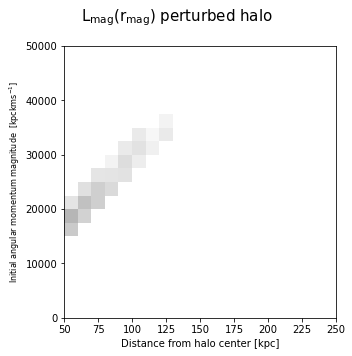

In [638]:
# sel2_part = rc.sel2(mw_lmc_sel1,220,50,13000,20000)
sel2_part = rc.sel2(mw_lmc_sel1,220,50,16000,21880)
pl.hist_r_l(mw_lmc_sel1[sel2_part],True,'mw_lmc_sel2')
wake_particles_pert, wake_particles_no_pert = rc.selected_ids(mw_lmc_sel1, sel2_part, mw, mw_lmc)

# Graficas

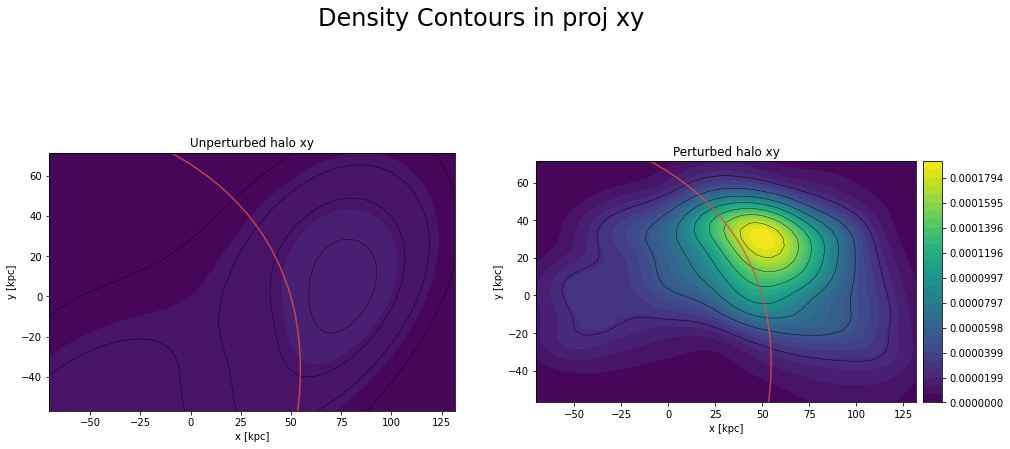

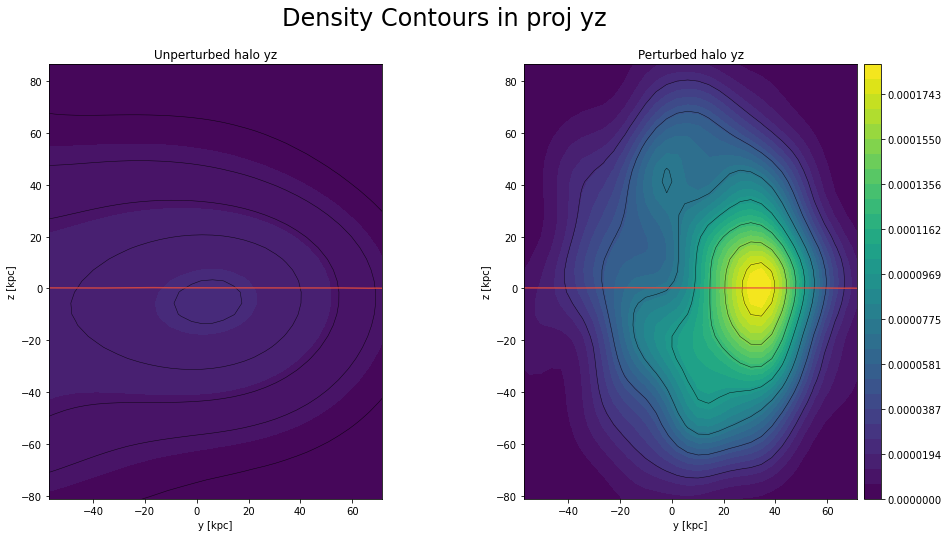

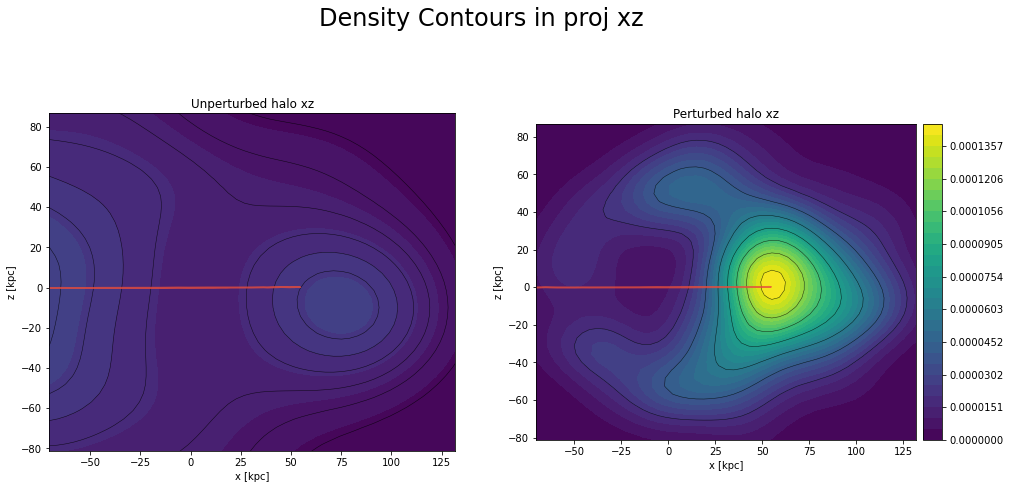

In [639]:

pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xy')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'yz')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xz')

Mean angle:  -0.6219572408220533
Standard deviation of angles:  1.8333774613168967
Circular variance:  0.5672837214019781
Divergence:  -34.336767904467635
Skewness of unperturbed halo inx direction: 4.997828246835928
Skewness of unperturbed halo in y direction: 4.027857036447443
Skewness of perturbed halo in x direction: 1.3784072775446155
Skewness of perturbed halo in y direction: 2.4271931352622023
Mean angle:  1.6106278635323383
Standard deviation of angles:  0.2506518728609519
Circular variance:  0.030959279223580105
Divergence:  194.52285839866184
The gradients are not clearly higher in one plot.


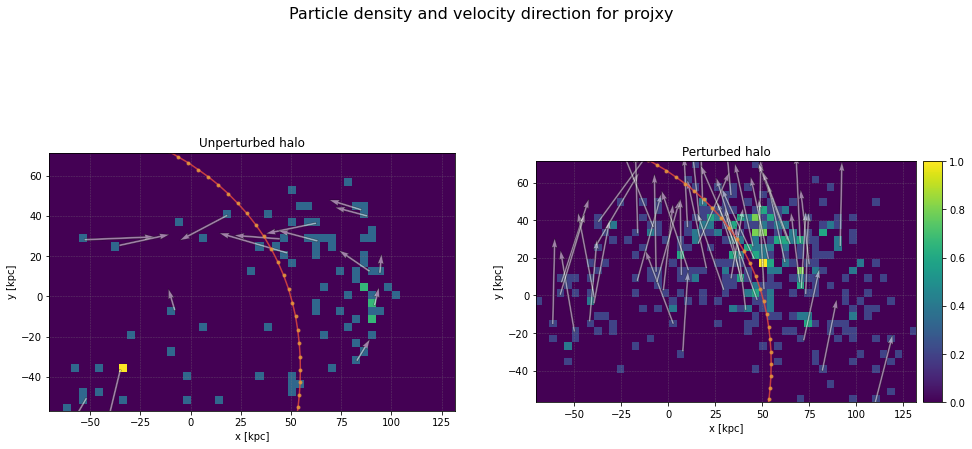

Mean angle:  -0.30007319965332396
Standard deviation of angles:  2.3257472408983095
Circular variance:  0.6088472001278429
Divergence:  -37.343199168586
Skewness of unperturbed halo iny direction: 3.281179761643525
Skewness of unperturbed halo in z direction: 4.960410898380096
Skewness of perturbed halo in y direction: 1.8727787237505658
Skewness of perturbed halo in z direction: 1.4583655309394643
Mean angle:  -0.020229778430347317
Standard deviation of angles:  0.24044515326702962
Circular variance:  0.02824635511331408
Divergence:  158.91060874905673
The gradients are not clearly higher in one plot.


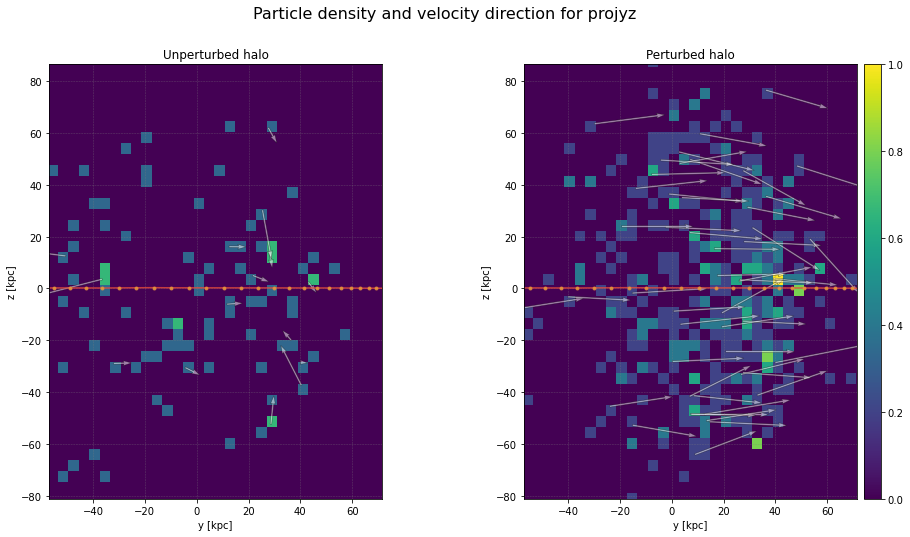

Mean angle:  -0.27476838971867557
Standard deviation of angles:  2.0776279873847696
Circular variance:  0.7311967250493064
Divergence:  15.970449439542094
Skewness of unperturbed halo inx direction: 3.344964687779452
Skewness of unperturbed halo in z direction: 4.0902915377792715
Skewness of perturbed halo in x direction: 1.756091902023012
Skewness of perturbed halo in z direction: 2.383068942042025
Mean angle:  -0.2571029748609647
Standard deviation of angles:  2.021415670315396
Circular variance:  0.8564036913068755
Divergence:  381.0507236352545
The second plot has a higher gradient.


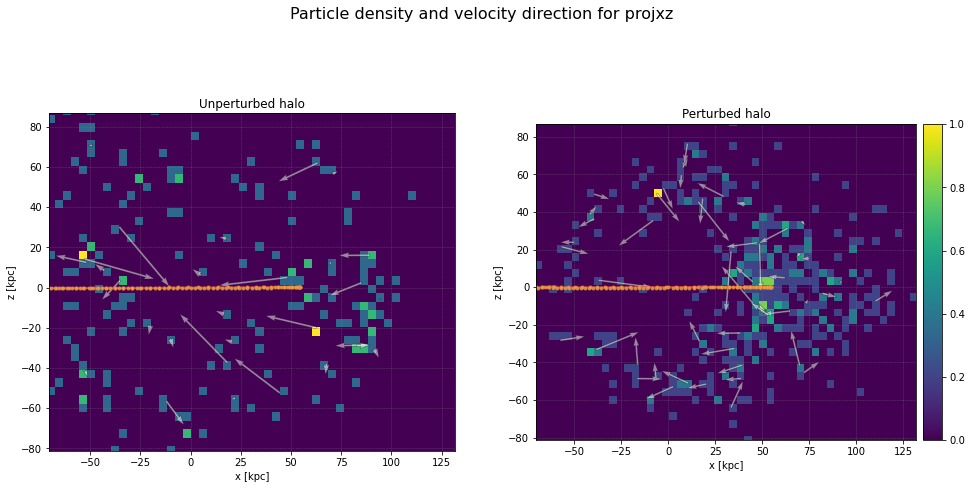

In [652]:
reload(pl)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xy',8,1500,0.005)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'yz',8,1500,0.005)
# Hacer zoom 
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xz',8,1500,0.005)

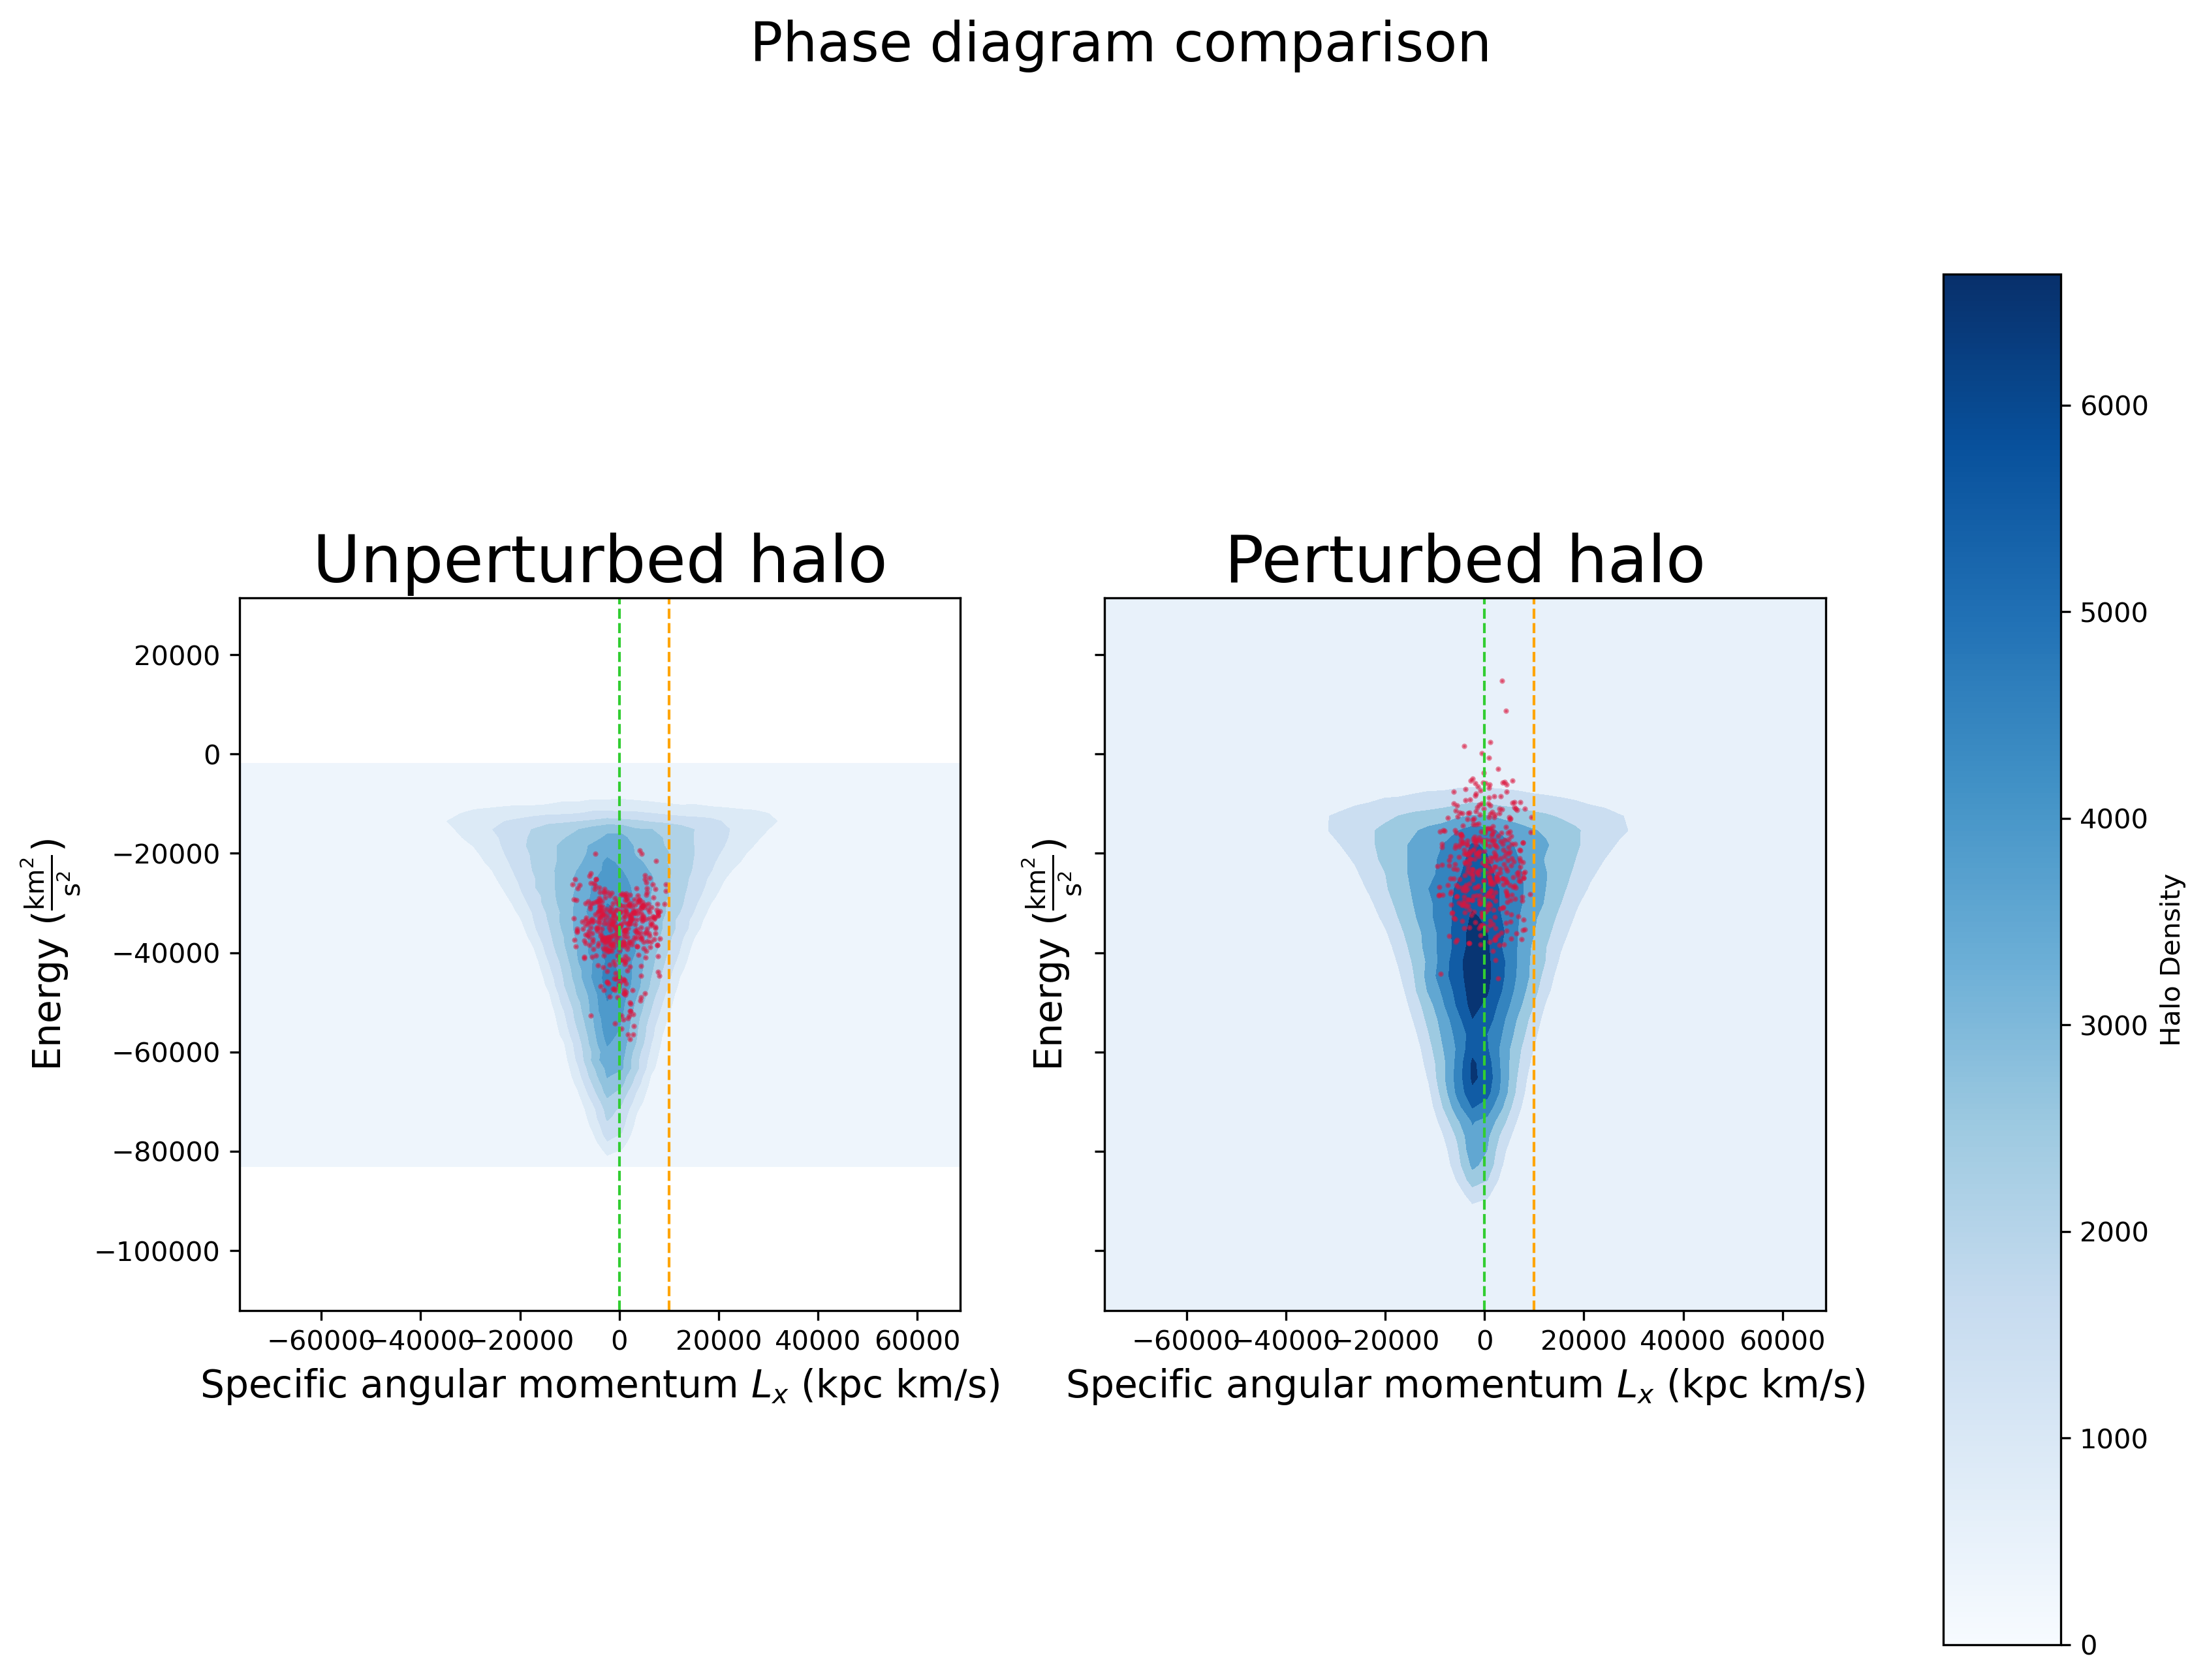

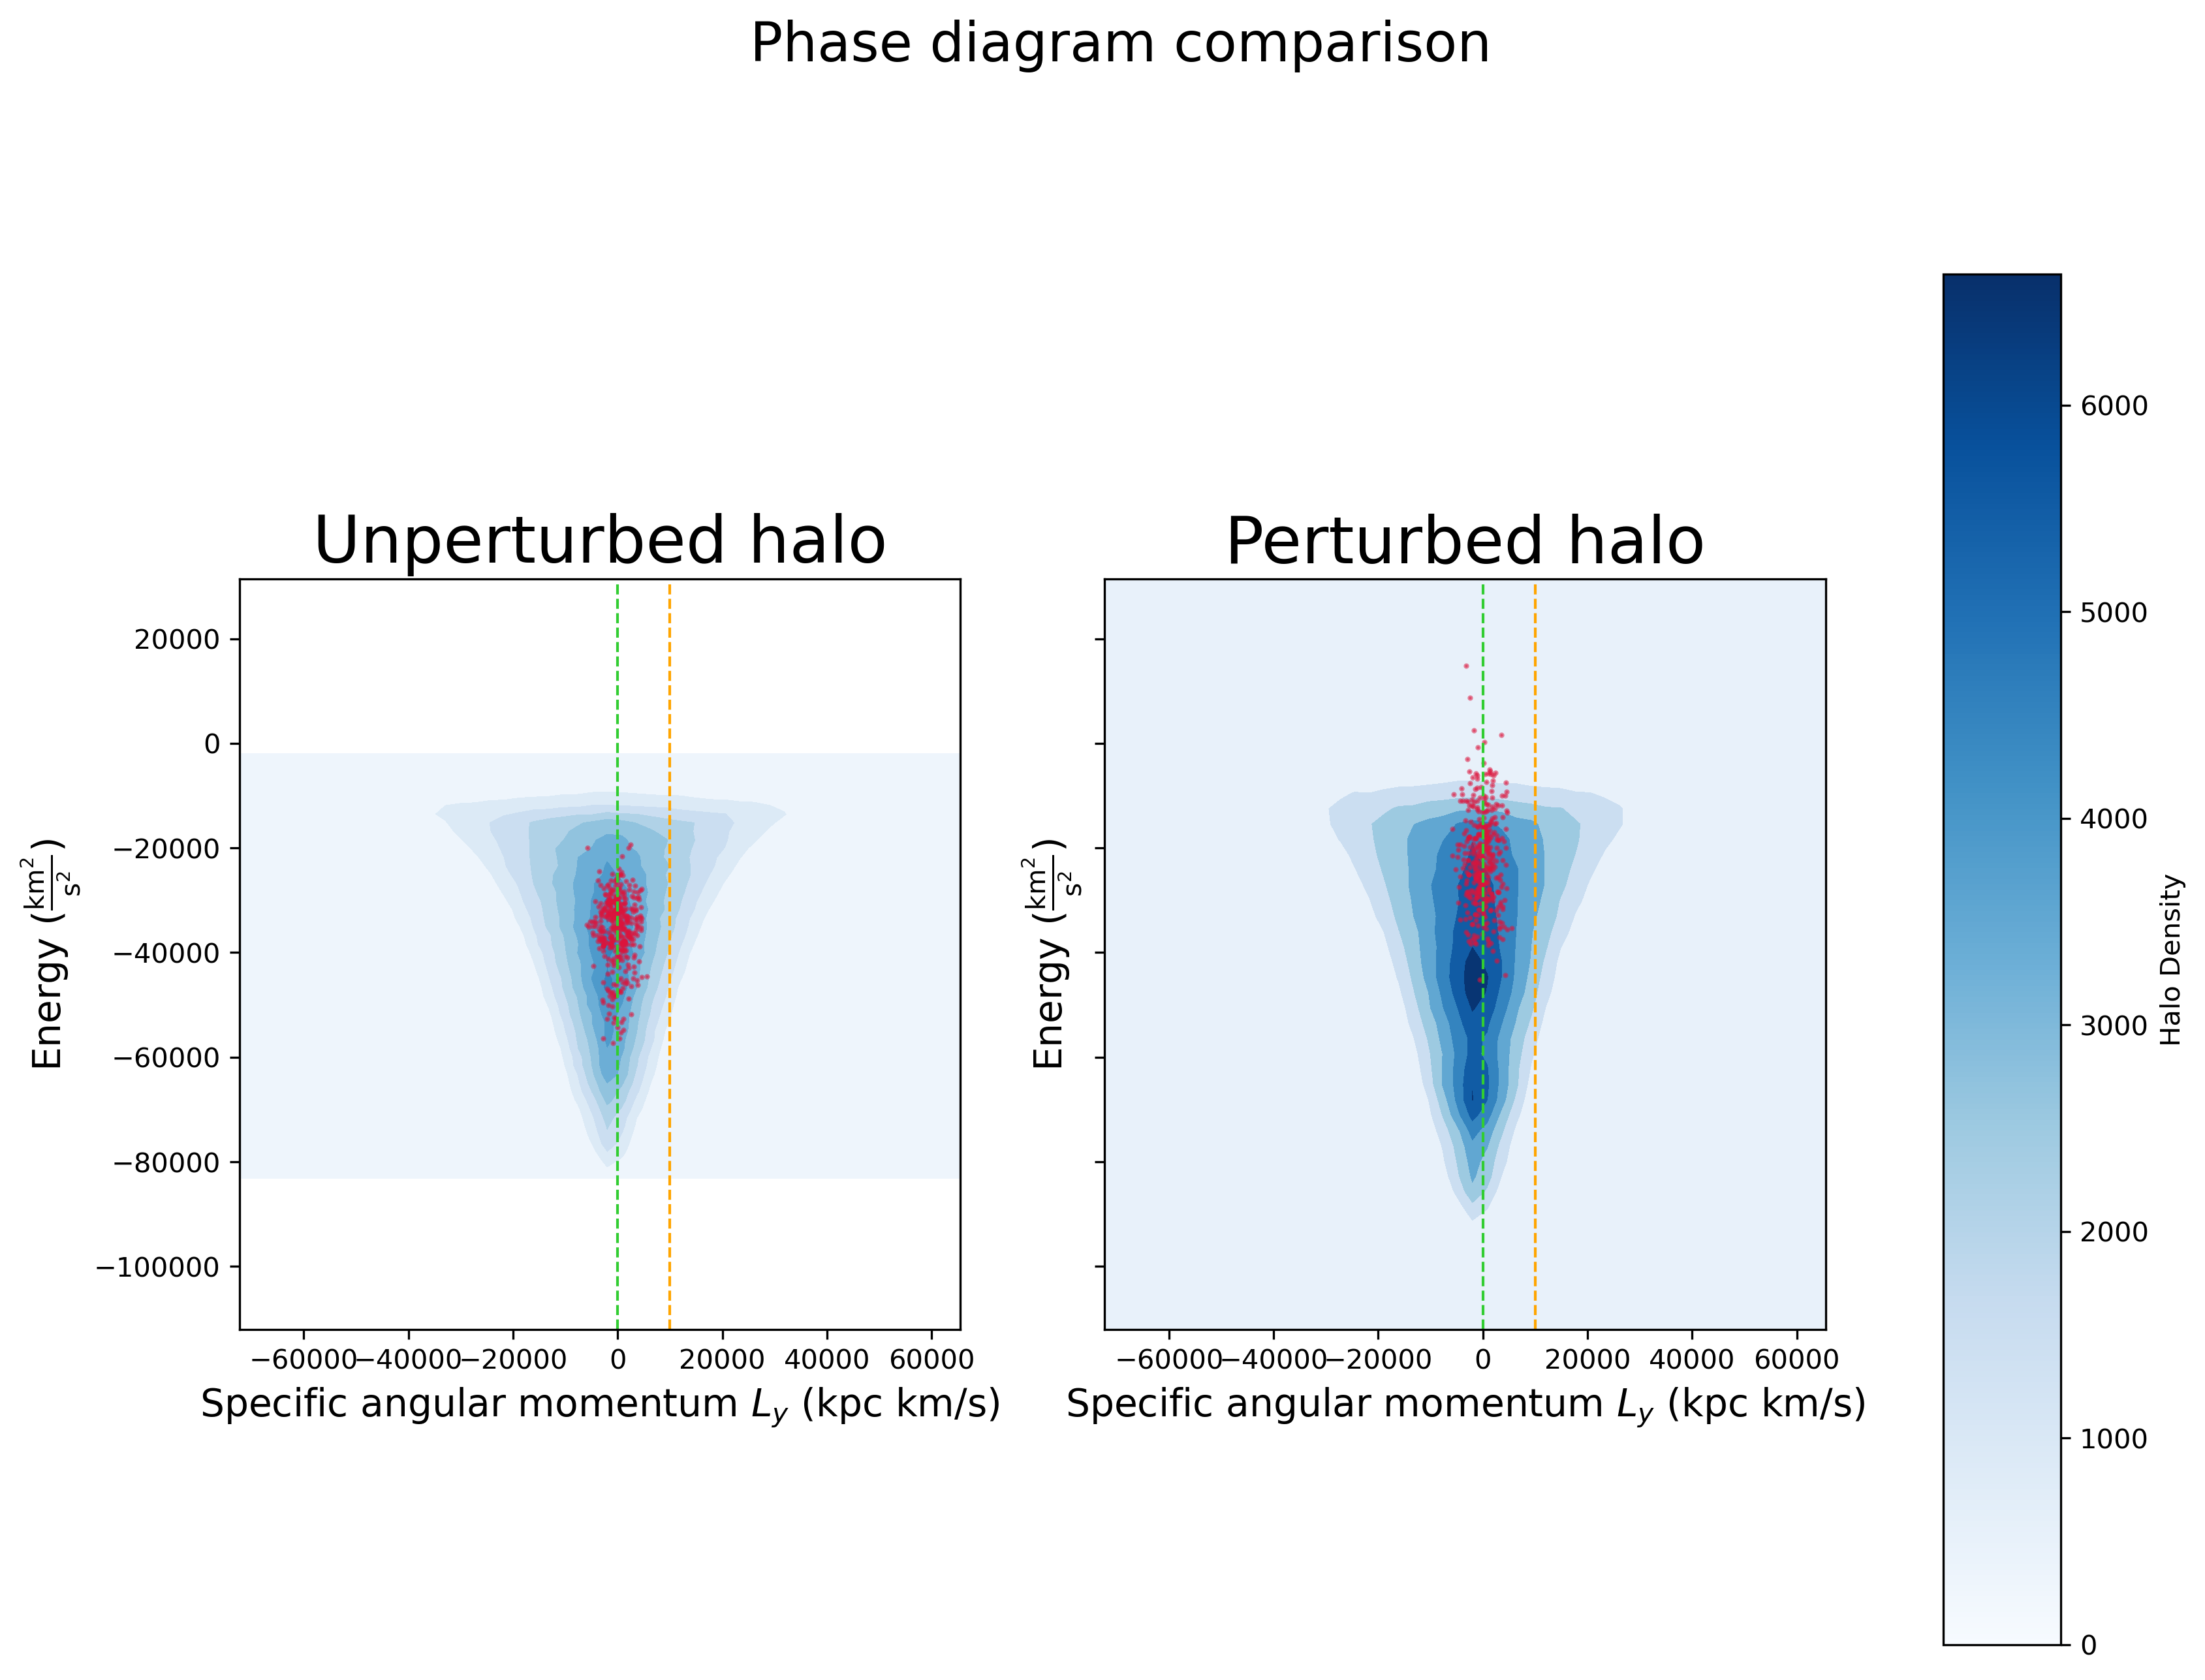

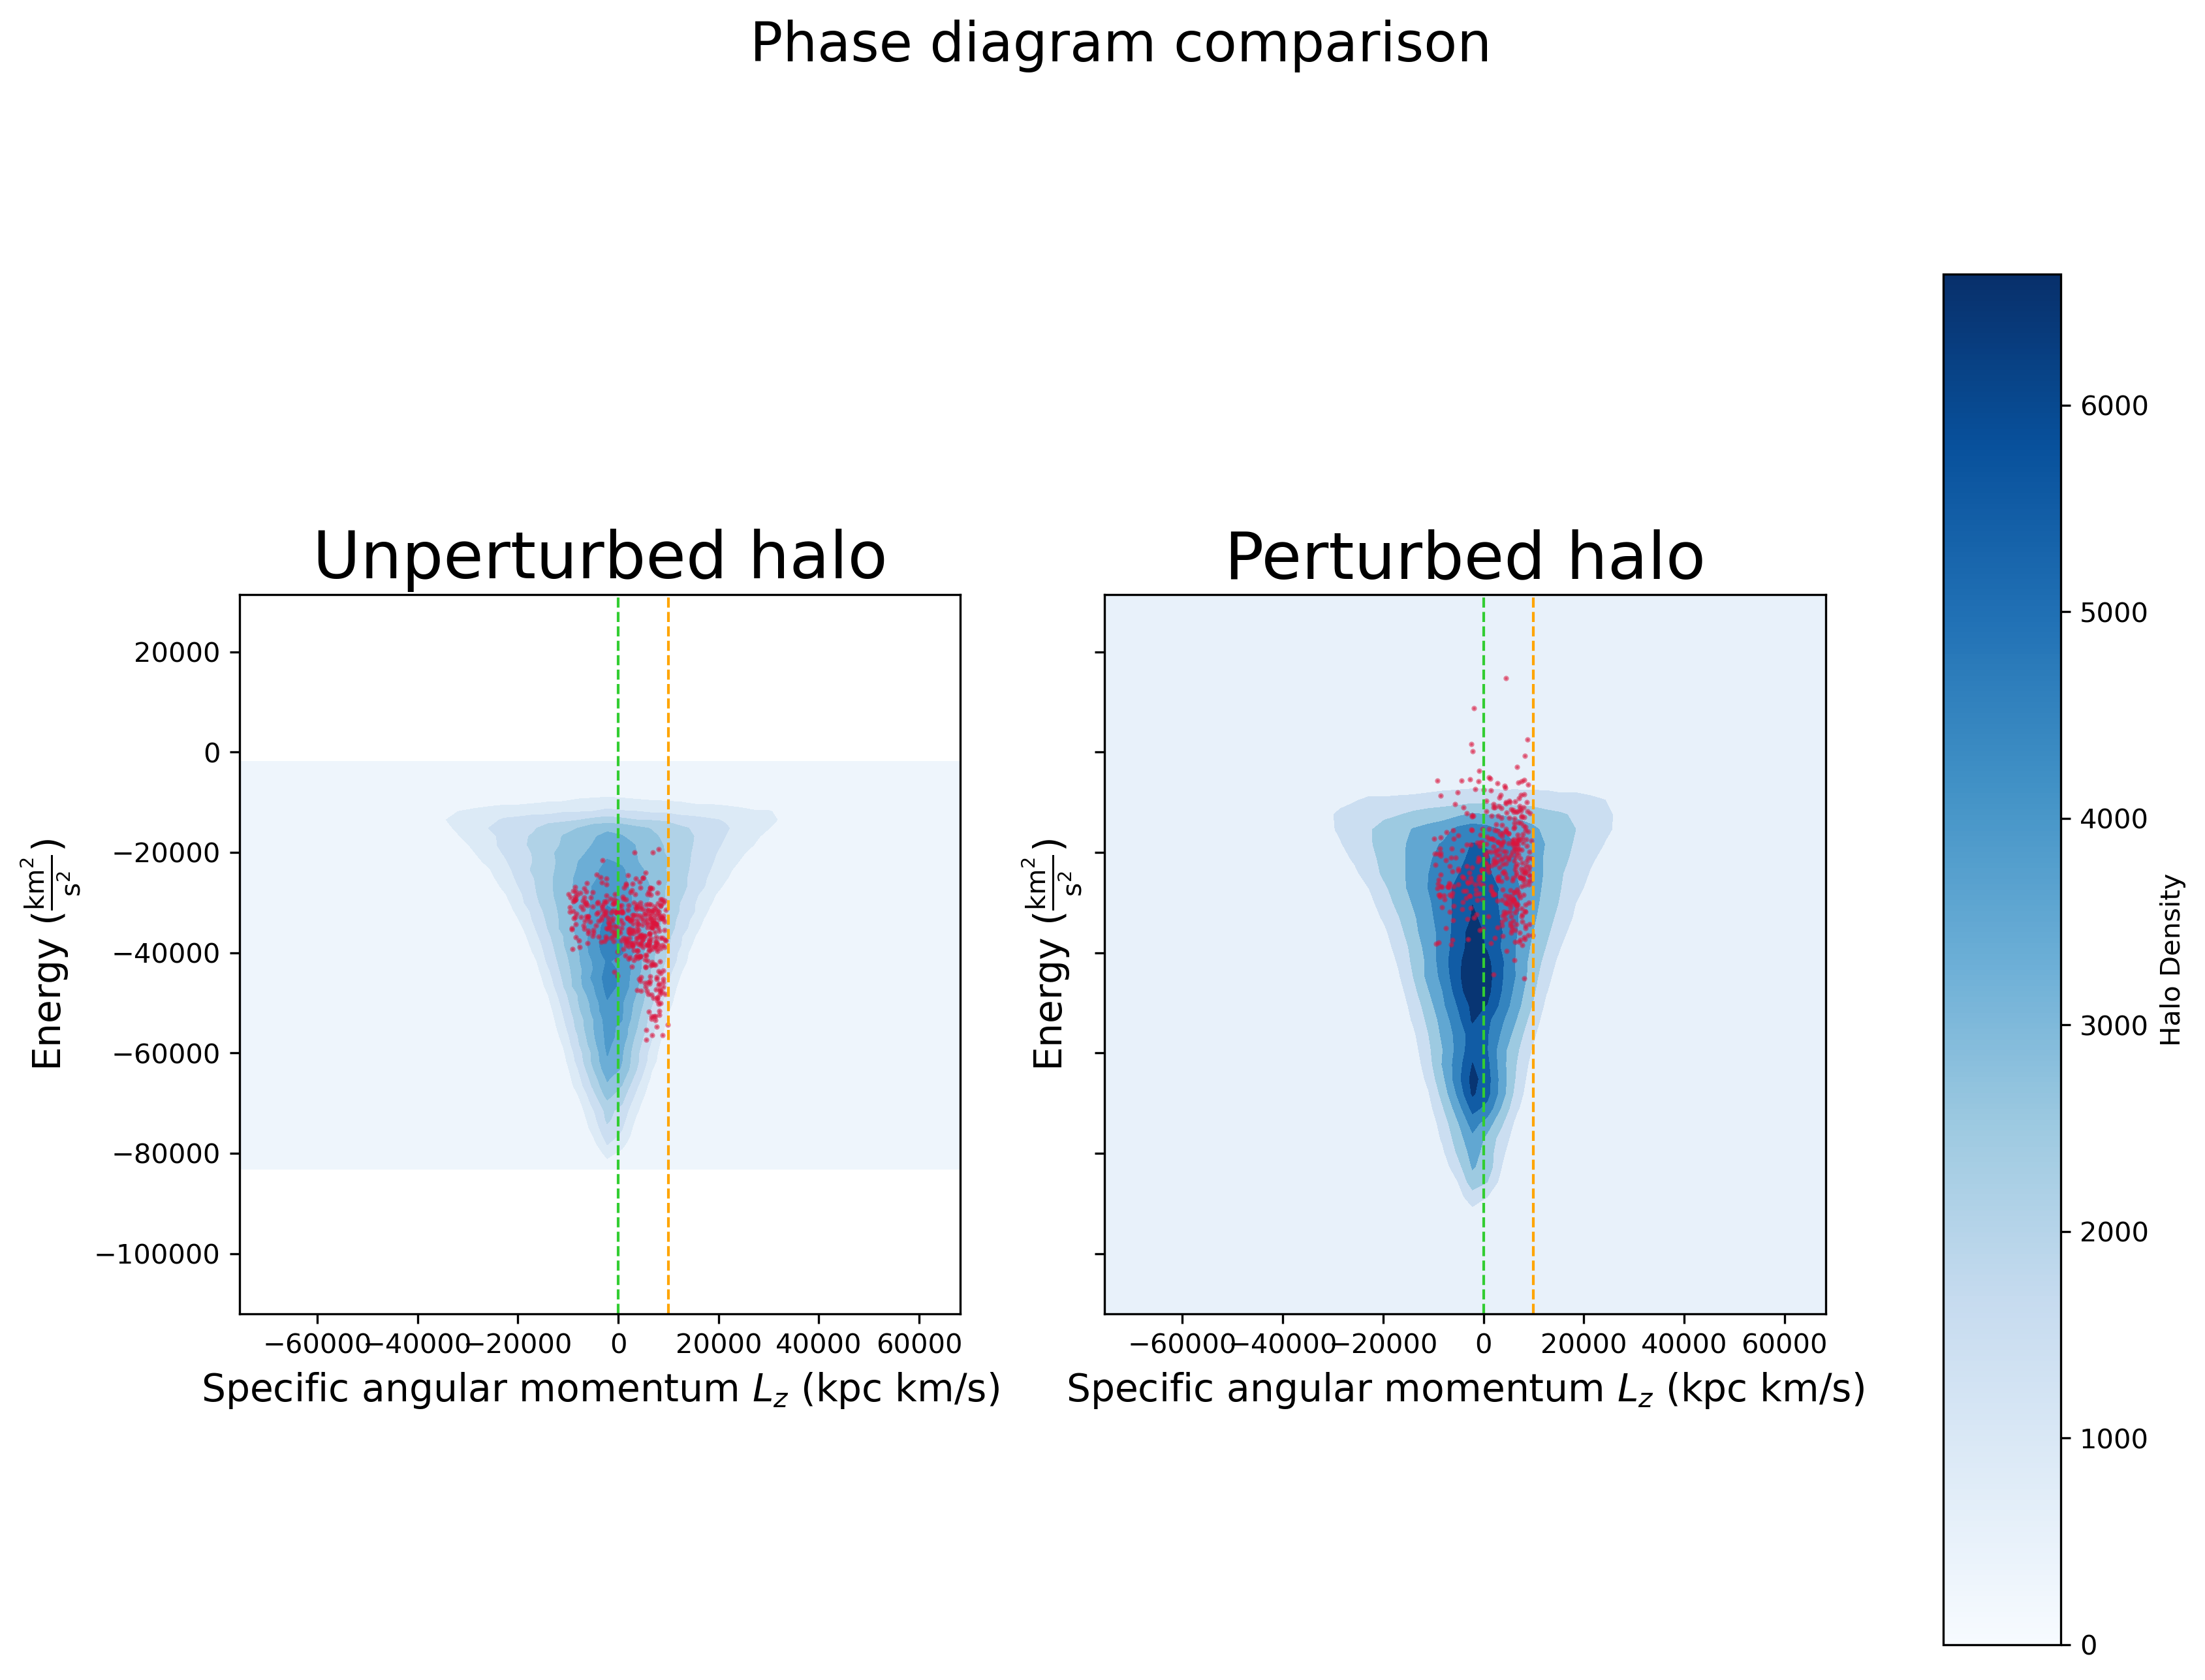

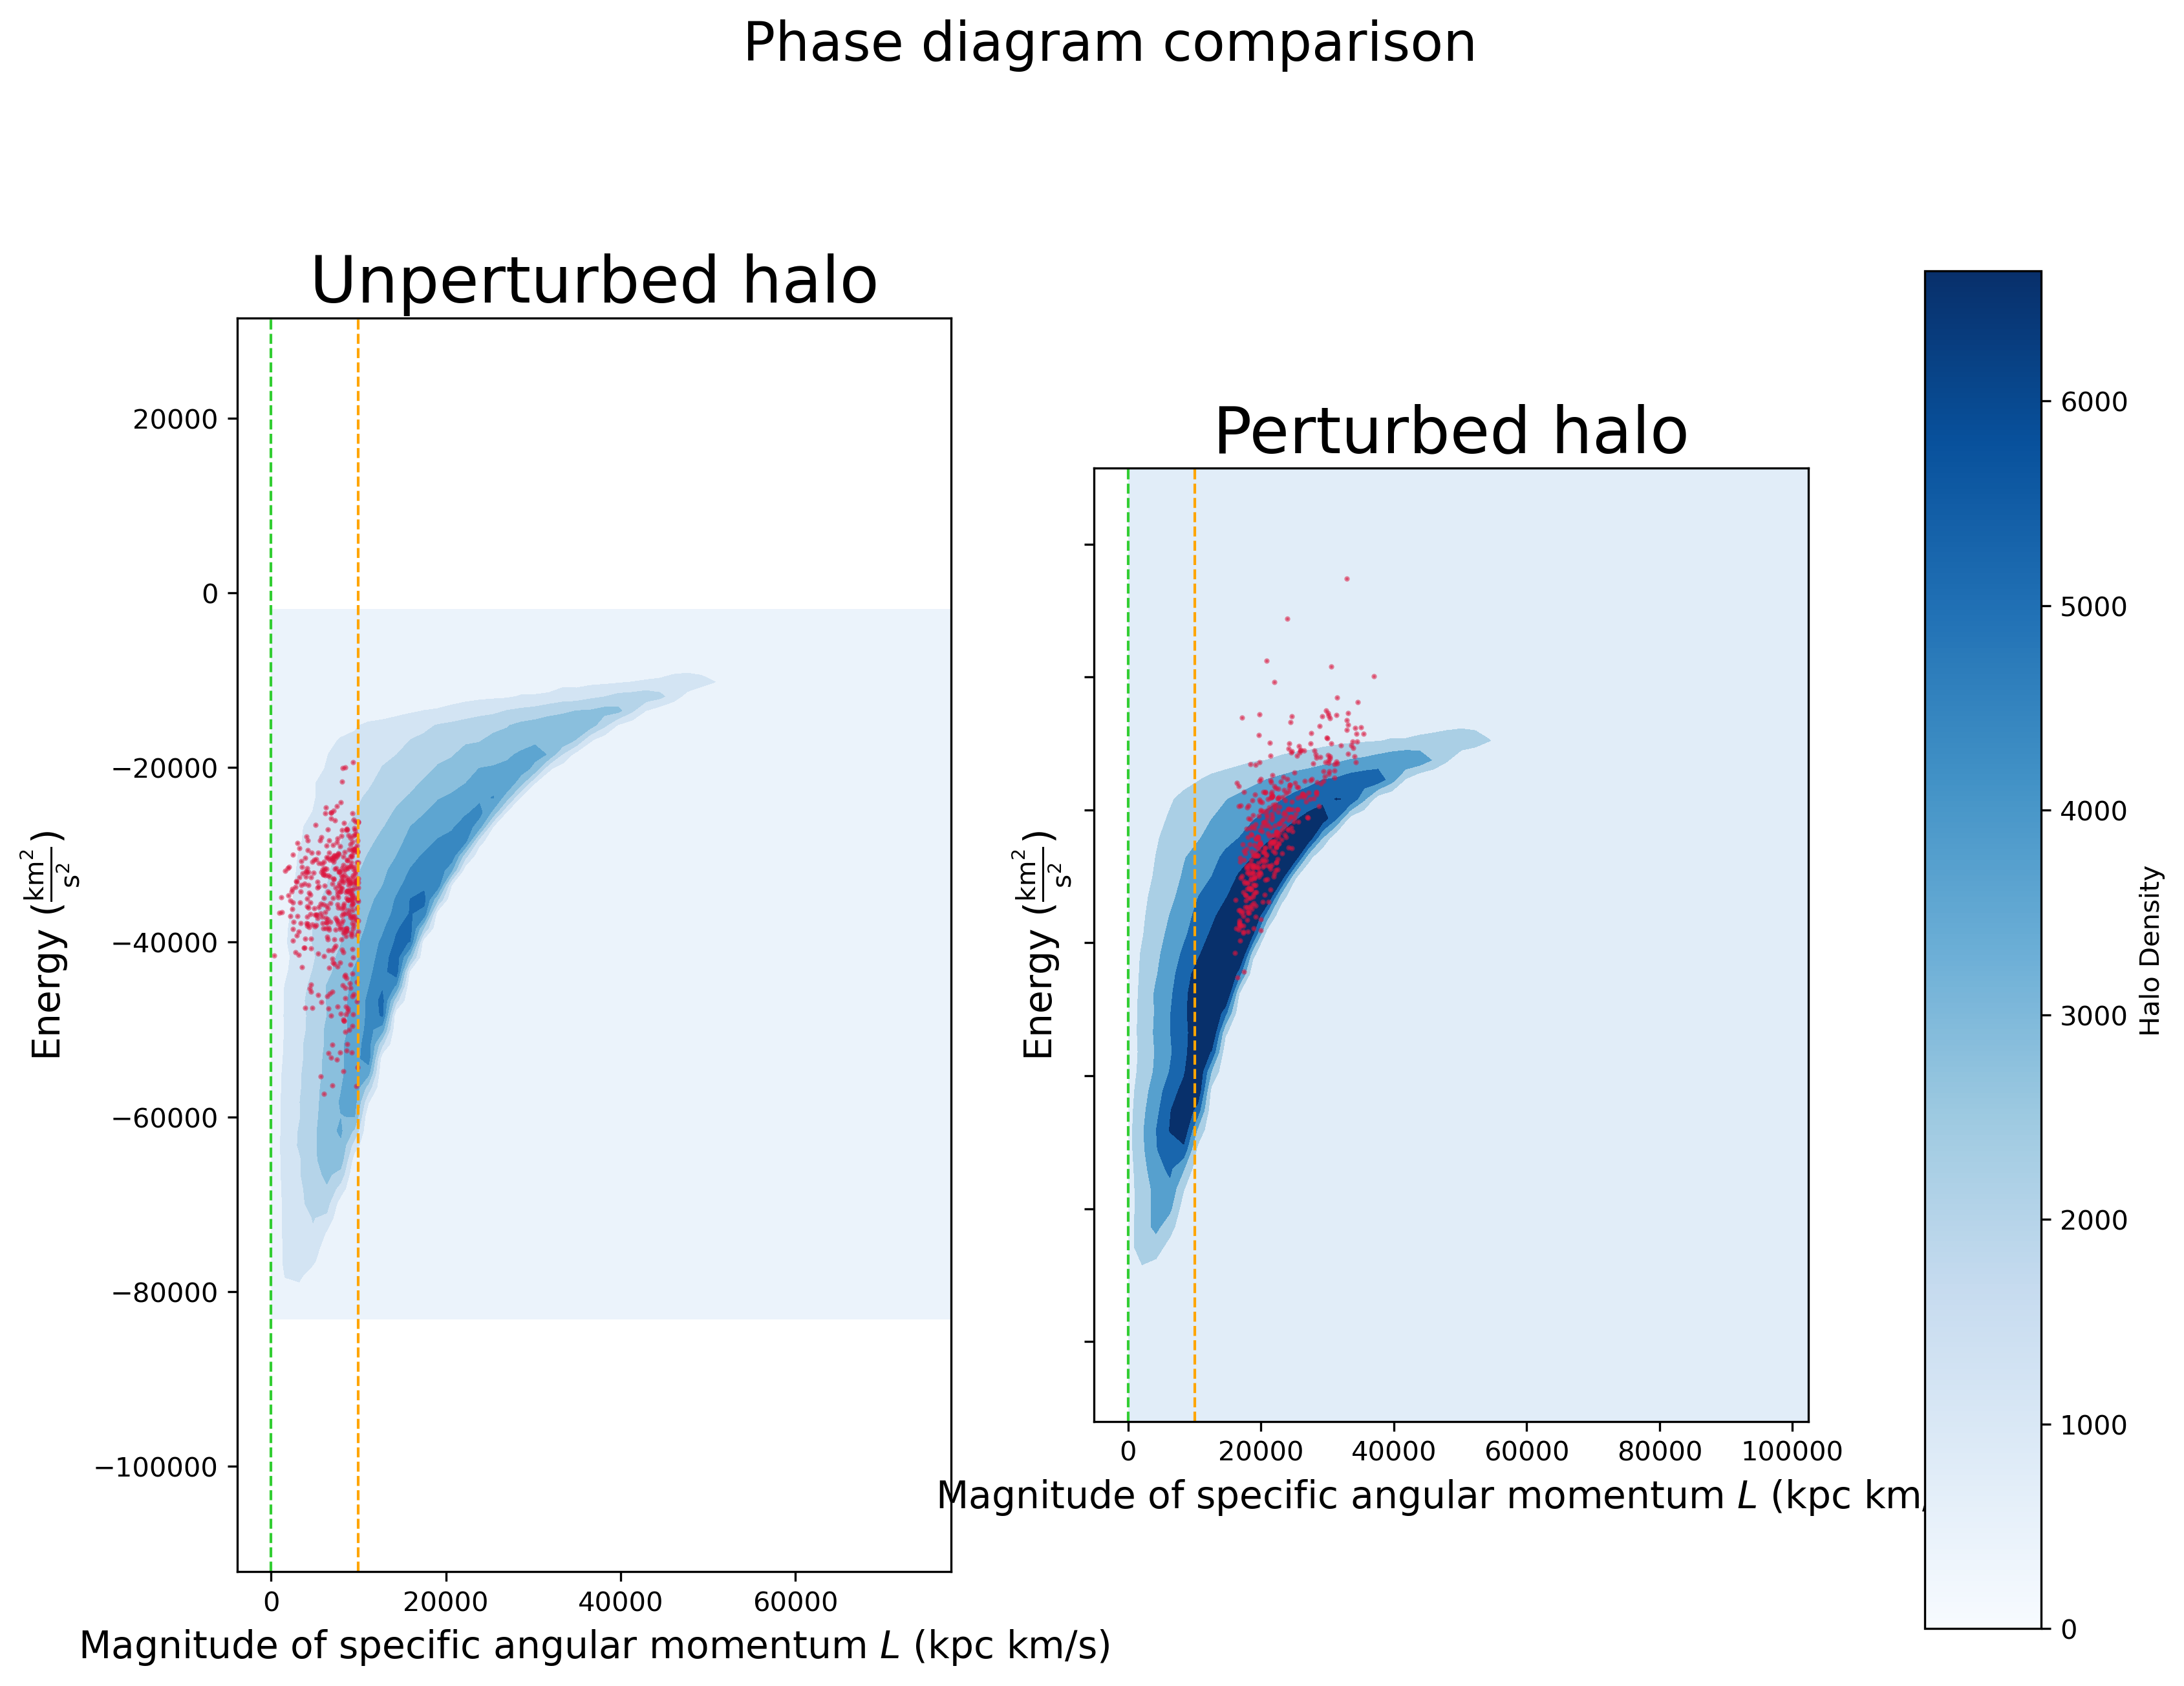

In [641]:
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'x')
pl.econt_scatter_side(mw, mw_lmc,wake_particles_no_pert, wake_particles_pert, 'y')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'z')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'mag')

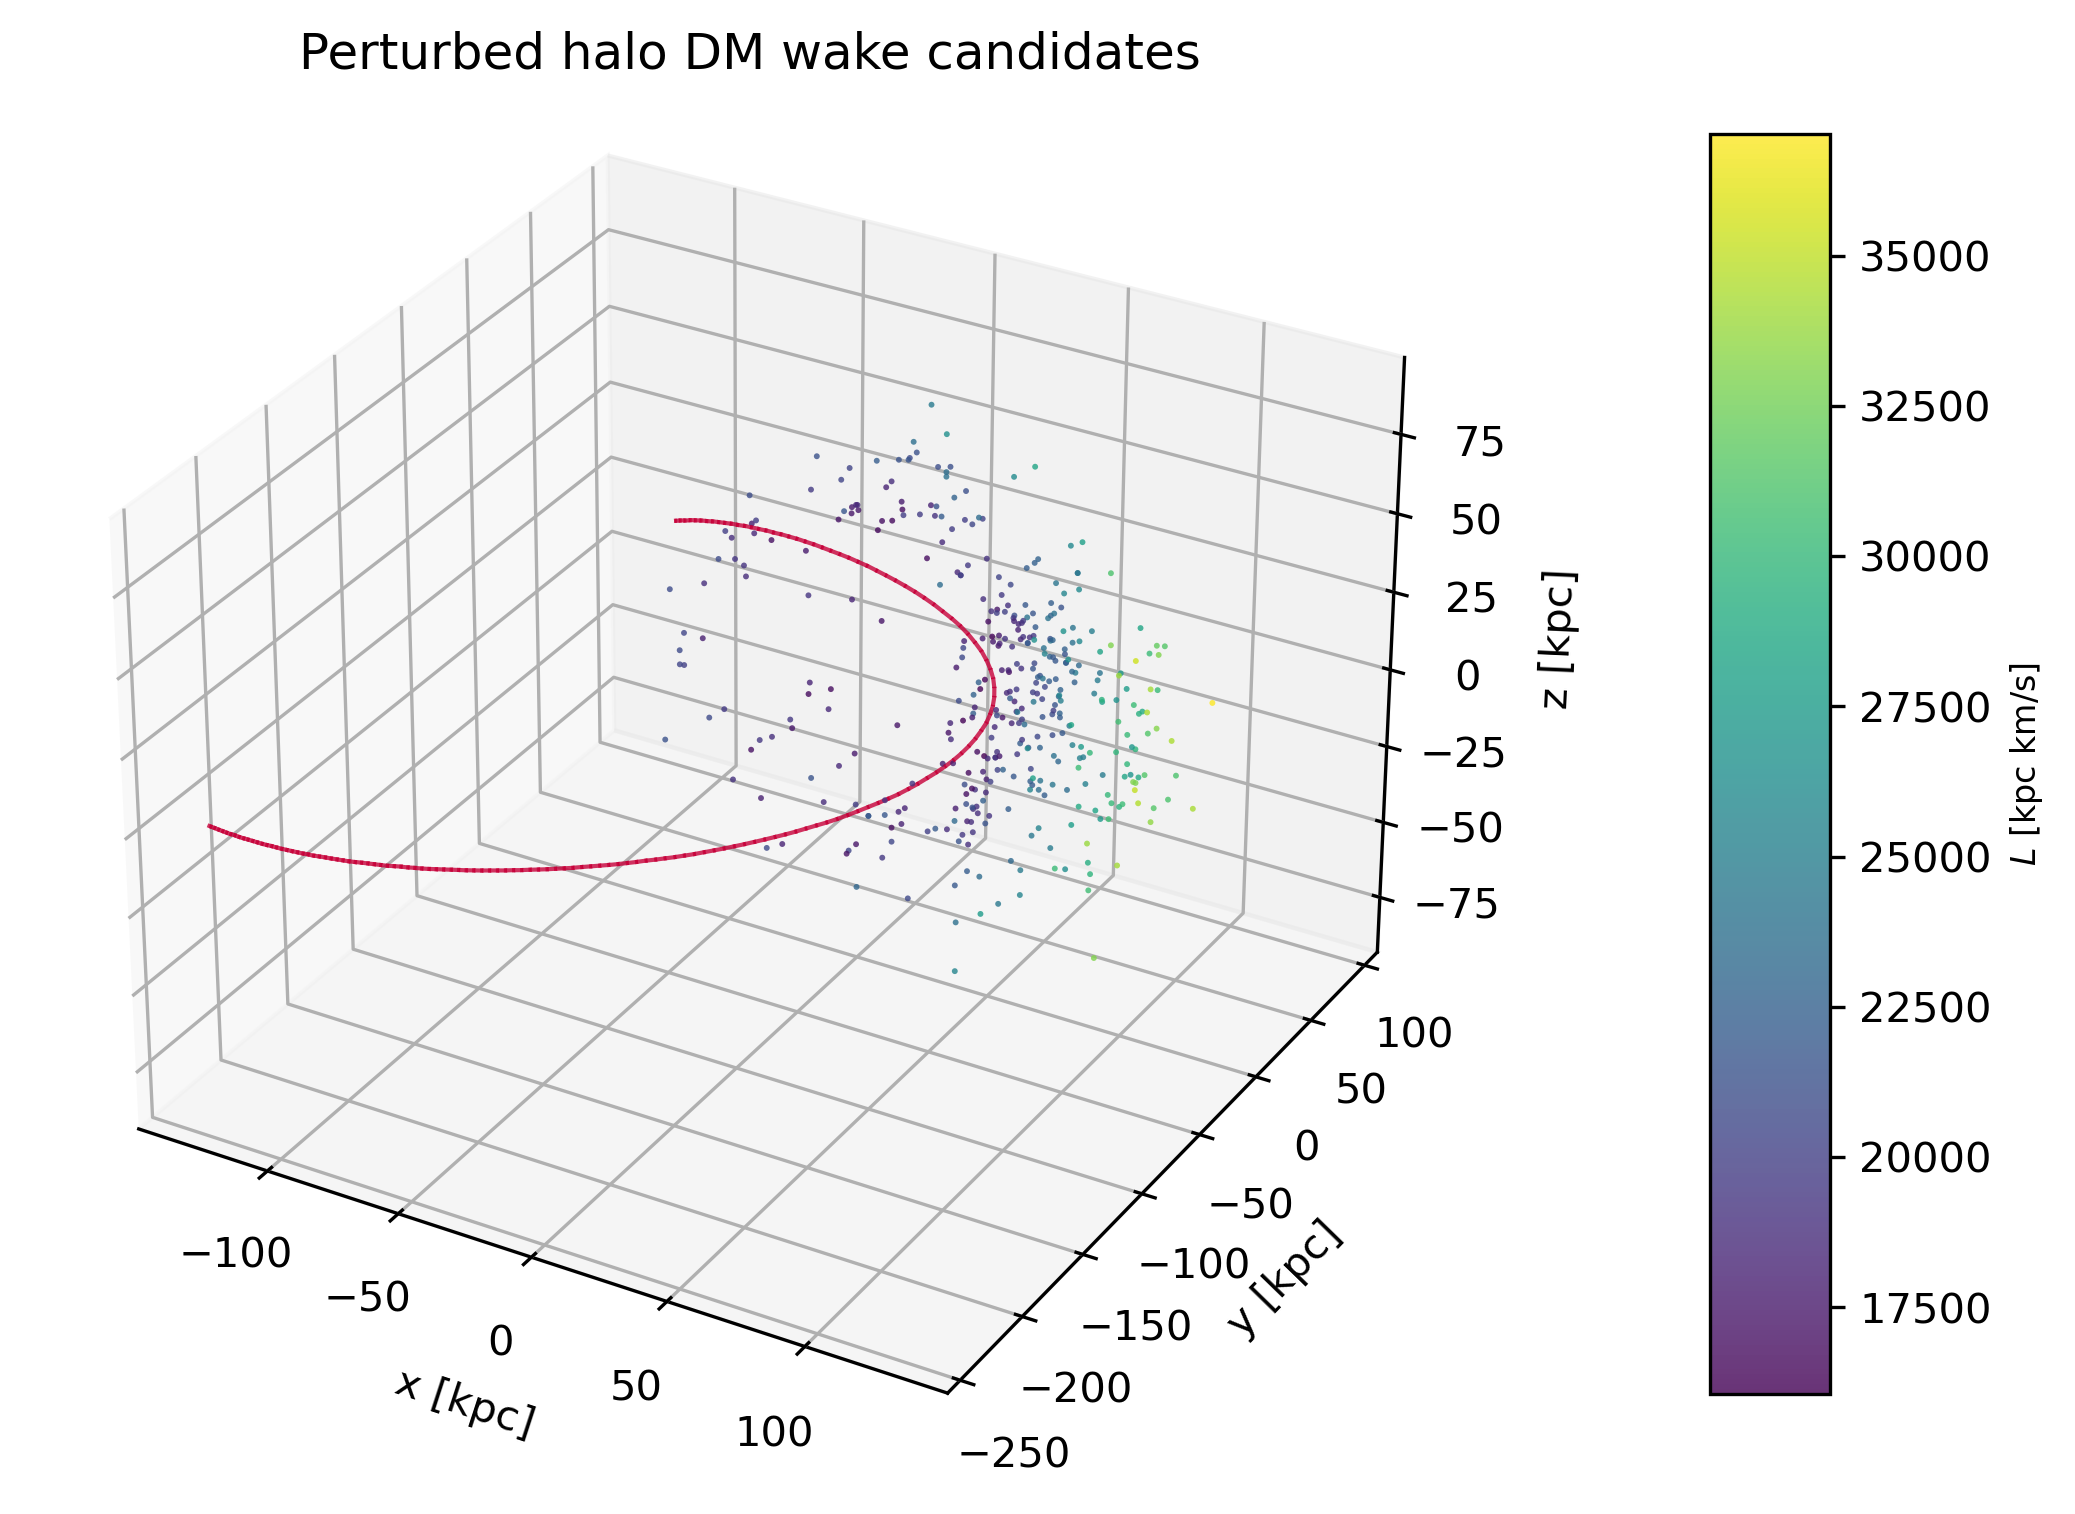

In [634]:
pl.plot_3d(wake_particles_pert, rel_lmc, 'DM wake pert part')
pl.plot_3d_plt(wake_particles_pert, rel_lmc, 'Perturbed halo DM wake candidates')


In [ ]:
# pl.plot_3d(wake_particles_no_pert, rel_lmc, 'DM wake no pert part')

In [ ]:
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xy")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xz")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"yz")

In [ ]:
pl.proj_xy(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_xz(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_yz(wake_particles_pert, rel_lmc)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'yz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xy',150)


In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xy')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xz')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'yz')


In [ ]:
pl.density_contour_plt(wake_particles_no_pert,rel_lmc, 'yz')
pl.density_contour_plt(wake_particles_pert,rel_lmc, 'yz')

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)
pl.vector_field_plt(wake_particles_no_pert, rel_lmc, 'yz',10,2500,0.005, False)

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)

In [ ]:
pl.hist_orbit_plt(wake_particles_pert, rel_lmc, 'yz',8,3000,0.005, True)
pl.hist_orbit_plt(wake_particles_no_pert, rel_lmc, 'yz',8,3000,0.005, False)


In [ ]:
reload(pl)
pl.E_L(mw,  'x', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'y', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'z', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'mag', 'scatter', wake_particles_no_pert)
pl.E_L(mw_lmc,  'x', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'y', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'z', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'mag', 'scatter', wake_particles_pert)


In [ ]:
reload(pl)
pl.econt_side_by_side(mw, mw_lmc,'x')
pl.econt_side_by_side(mw, mw_lmc,'y')
pl.econt_side_by_side(mw, mw_lmc,'z')
pl.econt_side_by_side(mw, mw_lmc,'mag')


In [ ]:
reload(pl)
pl.E_L_contour(mw,  'x')
pl.E_L_contour(mw_lmc,  'x')
pl.E_L_contour(mw,  'y')
pl.E_L_contour(mw_lmc,  'y')
pl.E_L_contour(mw,  'z')
pl.E_L_contour(mw_lmc,  'z')


# pl.E_L_contour(wake_particles_pert,  'x', wake_particles_pert)


In [ ]:
reload(pl)
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'x')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'y')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'z')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'mag')

# Generalizacion

In [ ]:
sel2_sel3 = rc.L_delta(wake_particles_pert, wake_particles_no_pert, 200)
pl.sel3(sel2_sel3, rel_lmc, 'xz')
pl.sel3(sel2_sel3, rel_lmc, 'yz')
pl.sel3(sel2_sel3, rel_lmc, 'xy')

In [ ]:
pl.plot_3d(sel2_sel3, rel_lmc, "Seleccion 3")

In [ ]:
sel1_sel3 = rc.L_delta(mw_lmc_sel1, mw_sel1, 900)
pl.sel3(sel1_sel3, rel_lmc, 'xz')
pl.sel3(sel1_sel3, rel_lmc, 'yz')
pl.sel3(sel1_sel3, rel_lmc, 'xy')



In [ ]:
pl.plot_3d(sel1_sel3, rel_lmc, "Seleccion 3")

In [ ]:
L_mag_delta_rot = rc.L_mag_delta(mw_lmc_sel1[:,10] , mw_sel1[:,10])
L_mag_delta = np.copy(L_mag_delta_rot[:,np.newaxis])
print("the shape of L_mag_delta_rot", L_mag_delta.shape)
print("L_mag", wake_particles_pert[:,10].shape)